Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="colorblind")
%matplotlib inline

Loading Data

In [34]:
df = pd.read_csv(
    "D:/kifiya AI/Insurance-Risk-Analytics-and-predictive-modeling/data/MachineLearningRating_v3.txt",
    sep="|",
    engine="python"
)
print("Rows × Columns:", df.shape)
print("Columns:", df.columns.tolist())

Rows × Columns: (1000098, 52)
Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


Descriptive stats

In [9]:
num_cols = ["TotalPremium", "TotalClaims", "CustomValueEstimate"]
desc = df[num_cols].describe().T
desc["cv"] = desc["std"] / desc["mean"]   # coefficient of variation
desc.style.background_gradient(cmap="YlGnBu")

,count,mean,std,min,25%,50%,75%,max,cv
TotalPremium,1000098.000000,61.905496,230.284513,-782.576754,0.000000,2.178333,21.929825,65282.603421,3.719936
TotalClaims,1000098.000000,64.861190,2384.074695,-12002.412281,0.000000,0.000000,0.000000,393092.105263,36.756567
CustomValueEstimate,220456.000000,225531.129942,564515.749848,20000.000000,135000.000000,220000.000000,280000.000000,26550000.000000,2.503050


Dtype & missing audit

In [10]:
audit = pd.DataFrame({
    "dtype": df.dtypes,
    "missing": df.isna().sum(),
    "missing_pct": df.isna().mean()*100
})
audit.sort_values("missing_pct", ascending=False)

,dtype,missing,missing_pct
NumberOfVehiclesInFleet,float64,1000098,100.000000
CrossBorder,object,999400,99.930207
CustomValueEstimate,float64,779642,77.956560
Rebuilt,object,641901,64.183810
Converted,object,641901,64.183810
WrittenOff,object,641901,64.183810
NewVehicle,object,153295,15.327998
Bank,object,145961,14.594670
AccountType,object,40232,4.022806
Gender,object,9536,0.953507


Loss Ratio aggregate

In [11]:
loss_ratio_portfolio = df["TotalClaims"].sum() / df["TotalPremium"].sum()
print(f"Portfolio Loss Ratio = {loss_ratio_portfolio:.2%}")

Portfolio Loss Ratio = 104.77%


Loss Ratio by Province (bar)

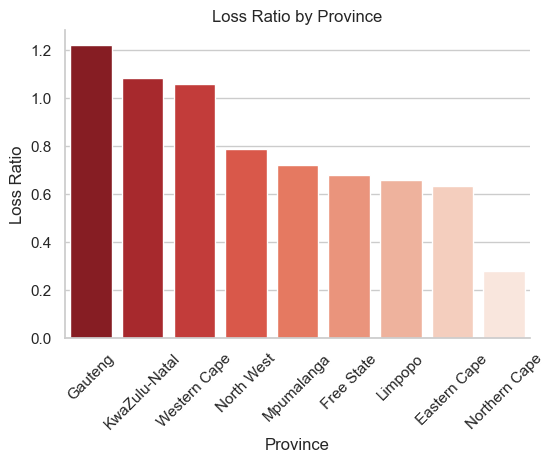

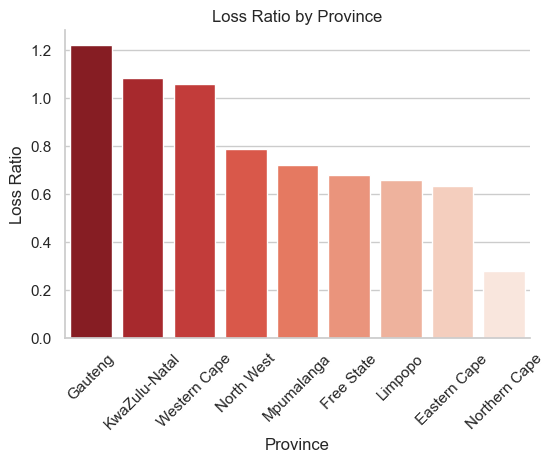

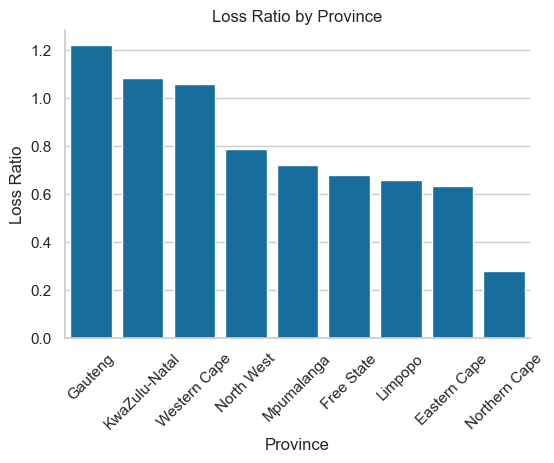

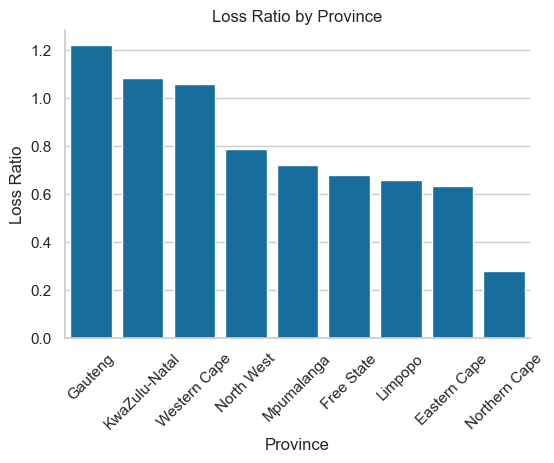

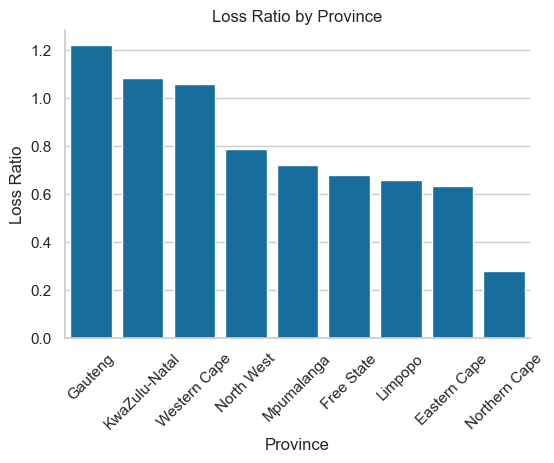

In [16]:
lr_prov = (
    df.groupby("Province")[["TotalClaims", "TotalPremium"]]
      .sum()
      .assign(LossRatio=lambda x: x["TotalClaims"] / x["TotalPremium"])
      ["LossRatio"]
      .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(x=lr_prov.index, y=lr_prov.values)
plt.title("Loss Ratio by Province"); 
plt.ylabel("Loss Ratio"); 
plt.xticks(rotation=45)
sns.despine()
plt.show()

Loss Ratio by VehicleType & Gender (grouped bar)

<Figure size 800x400 with 0 Axes>

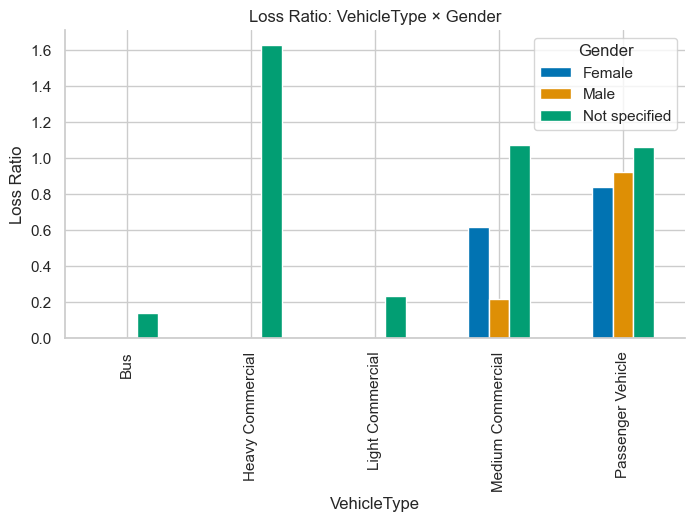

In [18]:
lr_vehicle_gender = (
    df.groupby(["VehicleType", "Gender"])[["TotalClaims", "TotalPremium"]]
      .sum()
      .assign(LossRatio=lambda x: x["TotalClaims"] / x["TotalPremium"])
      .reset_index()
      .pivot(index="VehicleType", columns="Gender", values="LossRatio")
)

plt.figure(figsize=(8,4))
lr_vehicle_gender.plot(kind="bar", figsize=(8,4))
plt.title("Loss Ratio: VehicleType × Gender")
plt.ylabel("Loss Ratio")
plt.legend(title="Gender")
sns.despine()

plt.show()


Distribution of key financials

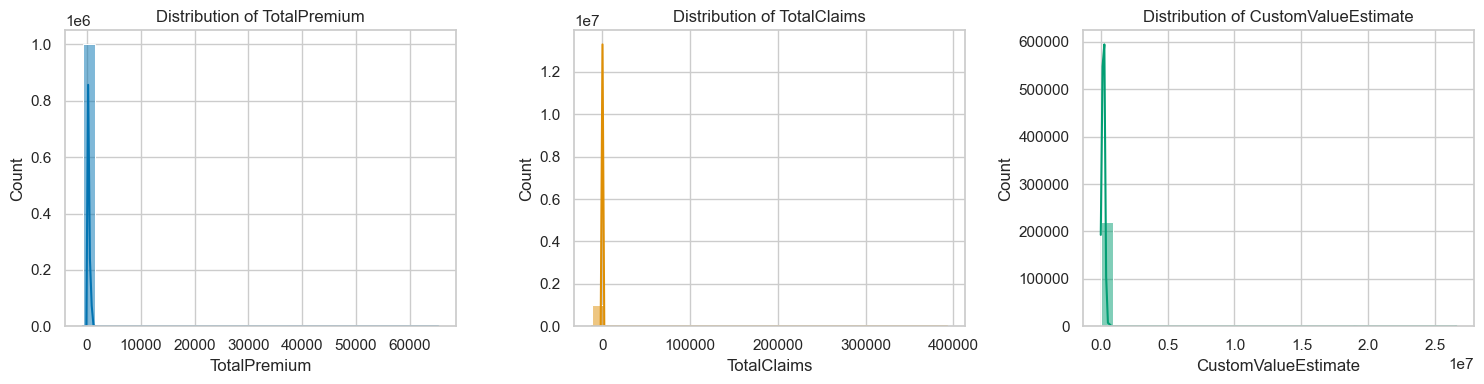

In [22]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
for i,col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=ax[i], bins=30, color=sns.color_palette()[i])
    ax[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


Outlier boxplots

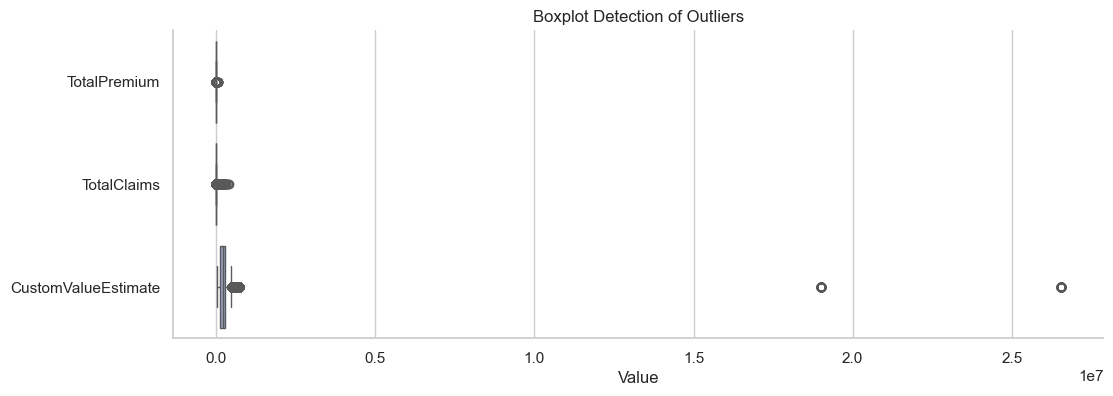

In [23]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df[num_cols], orient="h", palette="Set2")
plt.title("Boxplot Detection of Outliers"); 
plt.xlabel("Value"); 
sns.despine()
plt.show()

Temporal trend

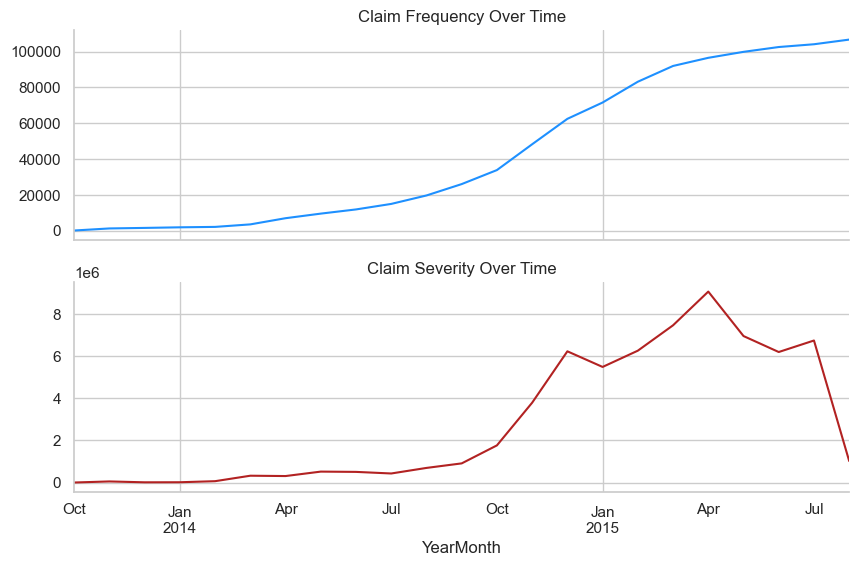

In [27]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")

df["YearMonth"] = df["TransactionMonth"].dt.to_period("M")
freq = df.groupby("YearMonth").size()
severity = df.groupby("YearMonth")["TotalClaims"].sum()
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
freq.plot(ax=ax[0], title="Claim Frequency Over Time", color="dodgerblue")
severity.plot(ax=ax[1], title="Claim Severity Over Time", color="firebrick")
sns.despine()
plt.show()

Top & Bottom vehicle makes by claim amount

In [31]:
make_stats = df.groupby("make").agg({"TotalClaims":"sum","TotalPremium":"sum"})
make_stats["LossRatio"] = make_stats["TotalClaims"] / make_stats["TotalPremium"]
top5 = make_stats["LossRatio"].nlargest(5)
bottom5 = make_stats["LossRatio"].nsmallest(5)
print("TOP 5 highest Loss Ratio Makes:\n", top5, "\n")
print("BOTTOM 5 lowest Loss Ratio Makes:\n", bottom5)

TOP 5 highest Loss Ratio Makes:
 make
SUZUKI                                 6.338194
JMC                                    4.081449
HYUNDAI                                3.989840
POLARSUN                               3.051418
MARCOPOLO                              2.999843
Name: LossRatio, dtype: float64 

BOTTOM 5 lowest Loss Ratio Makes:
 make
CHERY                                  0.0
CITROEN                                0.0
DAIHATSU                               0.0
FORD                                   0.0
GEELY                                  0.0
Name: LossRatio, dtype: float64


Correlation matrix

In [33]:
corr_df = df.groupby("PostalCode")[["TotalPremium","TotalClaims"]].sum()
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", square=True, cbar_kws={"shrink":.8})
plt.title("Correlation: TotalPremium vs TotalClaims (ZipCode aggregated)")

Text(0.5, 1.0, 'Correlation: TotalPremium vs TotalClaims (ZipCode aggregated)')